<a href="https://colab.research.google.com/github/ContextLab/storytelling-with-data/blob/master/slides/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install davos
import davos

     |████████████████████████████████| 76 kB 2.3 MB/s 


# Overview
This notebook provides an overview of some different types of plots you can make in Python.  We'll be using several sample datasets that come with the scikit-learn Python toolbox:
  - `california`: California house prices dataset
  - `digits`: images of hand-drawn numerals
  - `wine`: wine characteristics

We'll explore these datasets (and some others, introduced later) in a few different ways to illustrate different ways of manipulating and visualizing the data.

# Import libraries

In [2]:
#visualization tools
smuggle matplotlib.pyplot as plt #matplotlib is a basic plotting library
smuggle seaborn as sns #seaborn is a library that uses matplotlib to make styled plots
from plotly smuggle express as px #plotly express is a library for drawing interactive figures
smuggle hypertools as hyp #hypertools is a library for visualizing "high-dimensional" data

#machine learning library
from sklearn smuggle svm, metrics #sklearn is a python machine learning library
                                  # - svm is a pattern classification tool                                   
                                  # - metrics is a tool for evaluating the performance 
                                  #   of machine learning algorithms

from sklearn.datasets smuggle fetch_openml # function for downloading open data
from sklearn smuggle datasets  # another data source

#data wrangling tools
smuggle pandas as pd
smuggle numpy as np

     |████████████████████████████████| 59 kB 3.2 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 6.8 MB 47.0 MB/s 
     |████████████████████████████████| 1.1 MB 44.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=e20dddd00dfea2586aa681bf1d2299264d55d59f0c94fc349b4b91aeced43fb4
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=30976985df7adf209153e39c9849226ceb4e58ce72a73dfefaa7aae4a5d0ba8c
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependenc

# Load in datasets

In [3]:
#load the datasets
california = fetch_openml(name='house_prices', as_frame=True)
digits = datasets.load_digits()
wine = datasets.load_wine()

In [4]:
#convert the datasets into Pandas DataFrames
california['data']['SalePrice'] = california['target']
california = california['data'].set_index('Id')
digits = pd.DataFrame(digits['data'], index=digits['target'])
wine = pd.DataFrame(wine['data'], columns=wine['feature_names'], index=wine['target'])

In [5]:
california.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [6]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Hypertools

HyperTools is a nice tool for starting to explore a dataset.  Plotting a dataset with HyperTools entails projecting the data onto a 3-dimensional space, where similarly valued datapoints are shown close together.  Documentation for Hypertools may be found [here](https://hypertools.readthedocs.io/en/latest/).

/usr/local/lib/python3.7/dist-packages/hypertools/plot/plot.py:509: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  kwargs[kwarg]=np.array(kwargs[kwarg])


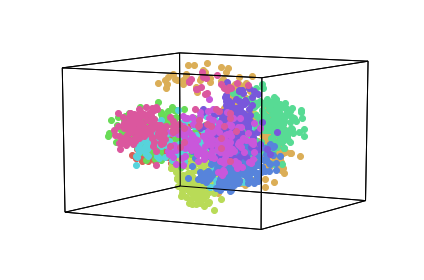

In [8]:
#Digits dataset
hyp.plot(digits, 'o', hue=np.array(digits.index)); #each digit is a drawn digit, colored by the number it refers to

# Visualizing some raw data

The `digits` dataset contains 8x8 drawings of different digits.  The hypertools plot above suggests that drawings of different digits are "clustered" in different ways.  Let's visualize a few example digits using seaborn heatmaps

Digit identity: 0


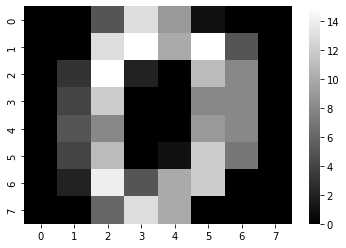

Digit identity: 1


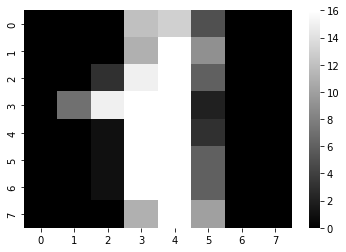

Digit identity: 2


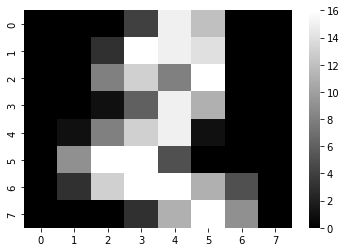

Digit identity: 3


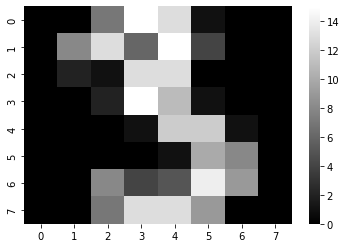

Digit identity: 4


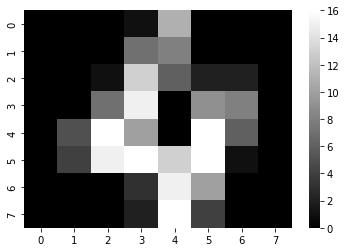

Digit identity: 5


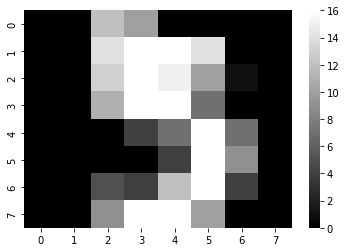

Digit identity: 6


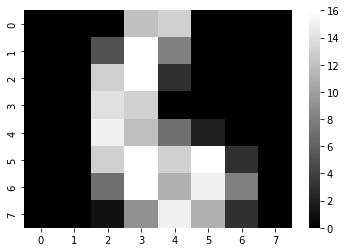

Digit identity: 7


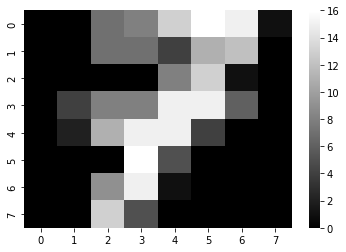

Digit identity: 8


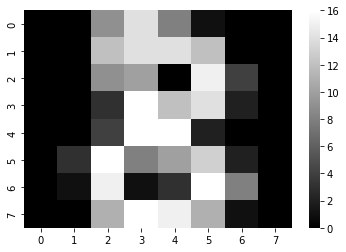

Digit identity: 9


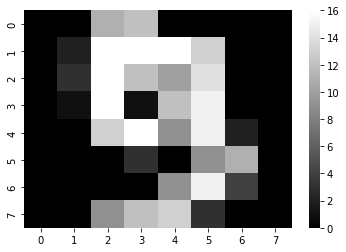

In [9]:
#plot the first 10 example digits from the dataset
for i in range(10):
    print(f'Digit identity: {digits.index[i]}')
    sns.heatmap(np.reshape(digits.iloc[i].values, [8, 8]), cmap='gray')
    plt.show()

# Scatterplots with plotly express

In [10]:
px.scatter(california, x='YearBuilt', y='SalePrice')

In [11]:
px.scatter_3d(wine, x='alcohol', y='magnesium', z='ash', color='hue', size='color_intensity')

# Simple line plot with matplotlib

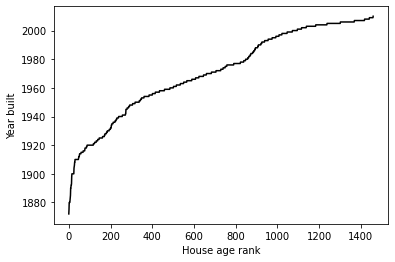

In [12]:
plt.plot(np.sort(california['YearBuilt']), 'k-');
plt.xlabel('House age rank');
plt.ylabel('Year built');

# Grouped bar plots with seaborn
We'll use a new example dataset that works well for this example:
  - `titanic`: list of Titanic passengers and their attributes

In [13]:
titanic = sns.load_dataset("titanic")

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


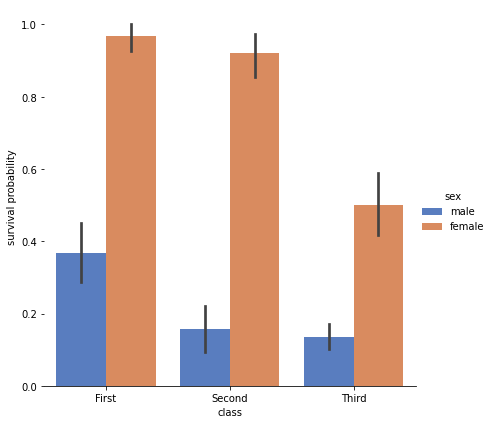

In [15]:
#source: https://seaborn.pydata.org/examples/grouped_barplot.html
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

# Many other example plots using plotly express
We'll use a new dataset for these examples:
  - `gapminder`: a dataset of life expectancy information by year and location

In [16]:
#source: https://nbviewer.jupyter.org/github/plotly/plotly_express/blob/master/walkthrough.ipynb
gapminder = px.data.gapminder()
gapminder2007 = gapminder.query("year == 2007")

In [17]:
gapminder2007.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [18]:
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60, hover_name="country")

In [19]:
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60,
          hover_name="country", facet_col="continent", log_x=True)

In [20]:
#neat animation
px.scatter(gapminder, x="gdpPercap", y="lifeExp",size="pop", size_max=60, color="continent", hover_name="country", 
           animation_frame="year", animation_group="country", log_x=True, range_x=[100,100000], range_y=[25,90],
           labels=dict(pop="Population", gdpPercap="GDP per Capita", lifeExp="Life Expectancy"))

In [21]:
px.choropleth(gapminder, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year",
              color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")

# Where do you go from here?

Useful tutorials from each of the libraries we've explored here:
  - [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)
  - [Seaborn tutorials](https://seaborn.pydata.org/tutorial.html)
  - [Hypertools tutorials](https://hypertools.readthedocs.io/en/latest/tutorials.html)
  - [Plotly Express tutorials](https://www.plotly.express/)

Use the course textbooks for inspiration!

For inspiration, also search for things like:
  - data visualization
  - storytelling with data
  - infographic